#Challenge 1 - Correlação e Regressão

---



## Tabelas

In [ ]:
#Importação de bibliotecas
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Leitura do CSV
df = pd.read_csv('desafio_01_preco_imoveis.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In [ ]:
#informações das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#Análise descritiva das variáveis
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais
variáveis são mais correlacionadas? Quais são menos correlacionadas?

In [ ]:
#Correlação entre preço e demais variáveis, em ordem decrescente
corr_price = df.corr()[['price']]
corr_price.sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003
waterfront,0.266369


## Plotagens

### Histplot e BoxPlot

Para as top 5 variáveis mais correlacionadas com o preço:
1. plote as suas distribuições (histograma e boxplot)

**R:** As 5 mais correlacionadas: sqft_living, grade, sqft_above, bathrooms, view.

Text(0.5, 1.0, 'Histograma de tamanho do imóvel (dentro da casa)')

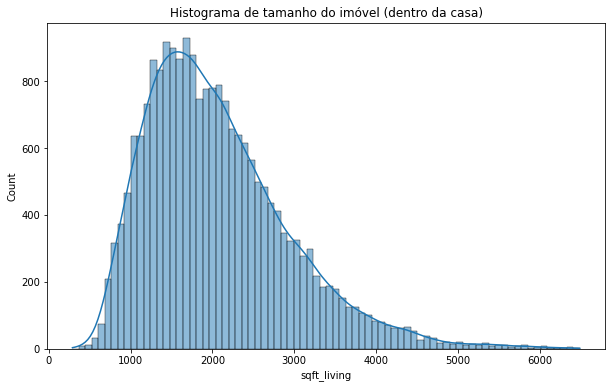

In [ ]:
ax1 = sns.histplot(data=df, x=df.query('sqft_living < 6500').sqft_living, kde=True)
ax1.figure.set_size_inches(10, 6)
ax1.set_title('Histograma de tamanho do imóvel (dentro da casa)')

Text(0.5, 1.0, 'Histograma de nota do imóvel')

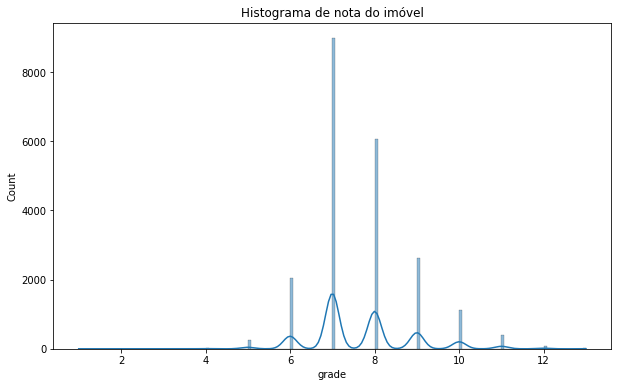

In [ ]:
ax2 = sns.histplot(data=df, x="grade", kde=True)
ax2.figure.set_size_inches(10, 6)
ax2.set_title('Histograma de nota do imóvel')

Text(0.5, 1.0, 'Histograma de tamanho da casa acima do solo (excluindo porão)')

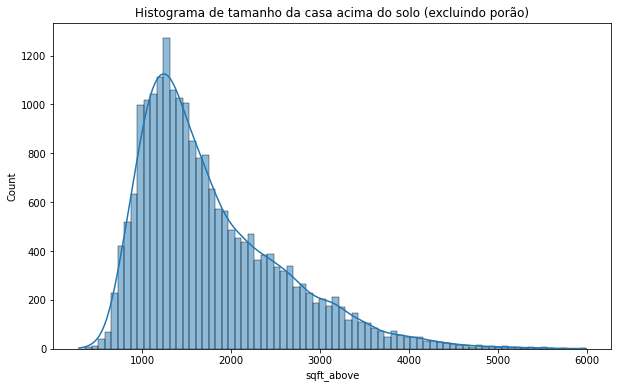

In [ ]:
ax3 = sns.histplot(data=df, x=df.query('sqft_above < 6000').sqft_above, kde=True)
ax3.figure.set_size_inches(10, 6)
ax3.set_title('Histograma de tamanho da casa acima do solo (excluindo porão)')

Text(0.5, 1.0, 'Histograma de número de banheiros')

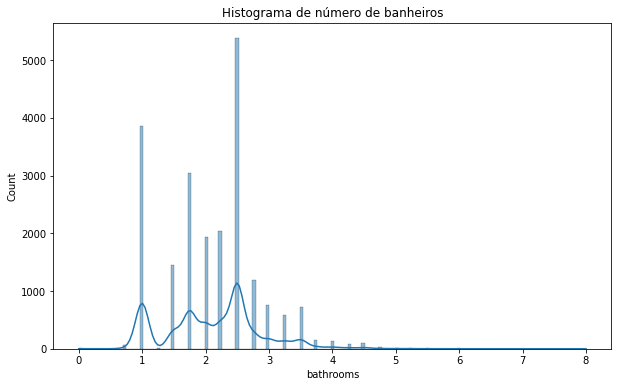

In [ ]:
ax4 = sns.histplot(data=df, x="bathrooms", kde=True)
ax4.figure.set_size_inches(10, 6)
ax4.set_title('Histograma de número de banheiros')

Text(0.5, 1.0, 'Histograma de número de quartos com vista')

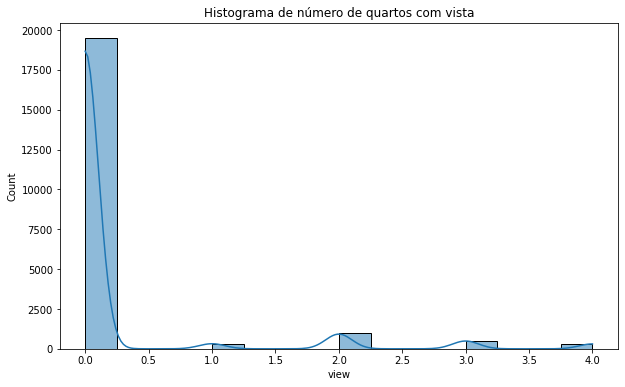

In [ ]:
ax5 = sns.histplot(data=df, x="view", kde=True)
ax5.figure.set_size_inches(10, 6)
ax5.set_title('Histograma de número de quartos com vista')

Text(0.5, 0, 'Squarefeet Living')

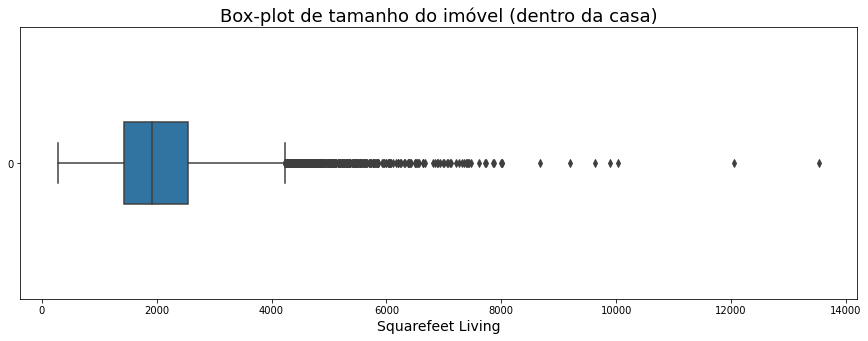

In [ ]:
#BoxPlot 
ax6 = sns.boxplot(data=df["sqft_living"], orient='h', width=0.3)
ax6.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura
ax6.set_title('Box-plot de tamanho do imóvel (dentro da casa)', fontsize=18)    # Configurando o título do gráfico
ax6.set_xlabel('Squarefeet Living', fontsize=14)

Text(0.5, 0, 'Grade')

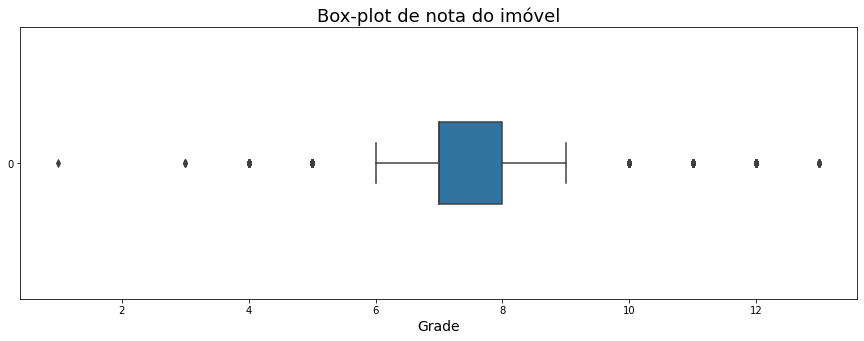

In [ ]:
#BoxPlot 
ax7 = sns.boxplot(data=df["grade"], orient='h', width=0.3)
ax7.figure.set_size_inches(15, 5)
ax7.set_title('Box-plot de nota do imóvel', fontsize=18)
ax7.set_xlabel('Grade', fontsize=14)

Text(0.5, 0, 'Squarefeet Above')

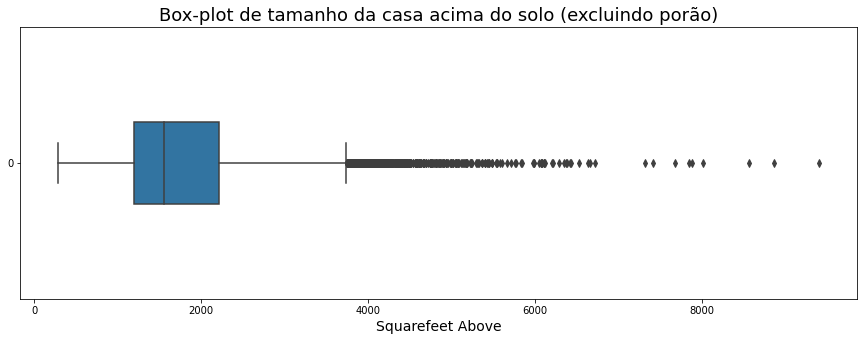

In [ ]:
#BoxPlot 
ax8 = sns.boxplot(data=df["sqft_above"], orient='h', width=0.3)
ax8.figure.set_size_inches(15, 5)
ax8.set_title('Box-plot de tamanho da casa acima do solo (excluindo porão)', fontsize=18)
ax8.set_xlabel('Squarefeet Above', fontsize=14)

Text(0.5, 0, 'Bathrooms')

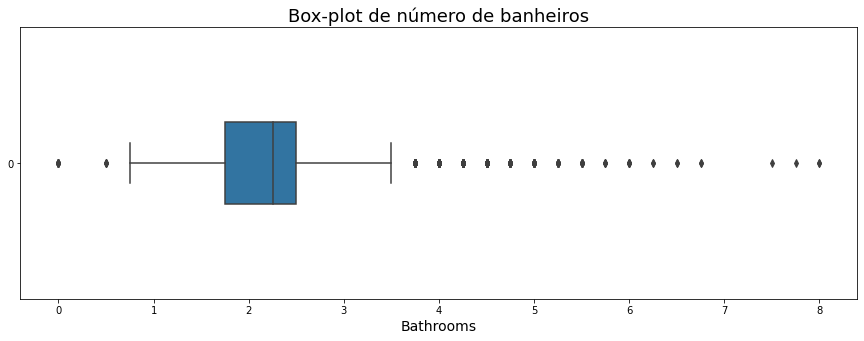

In [ ]:
#BoxPlot 
ax9 = sns.boxplot(data=df["bathrooms"], orient='h', width=0.3)
ax9.figure.set_size_inches(15, 5)
ax9.set_title('Box-plot de número de banheiros', fontsize=18)
ax9.set_xlabel('Bathrooms', fontsize=14)

Text(0.5, 0, 'Rooms with view')

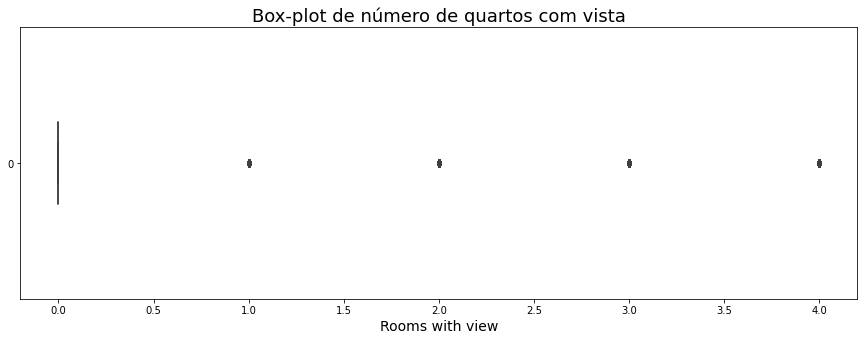

In [ ]:
#BoxPlot 
ax10 = sns.boxplot(data=df["view"], orient='h', width=0.3)
ax10.figure.set_size_inches(15, 5)
ax10.set_title('Box-plot de número de quartos com vista', fontsize=18)
ax10.set_xlabel('Rooms with view', fontsize=14)

### Scatterplot

2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X

Text(0.5, 1.0, 'Scatterplot entre preço e tamanho do imóvel (dentro da casa)')

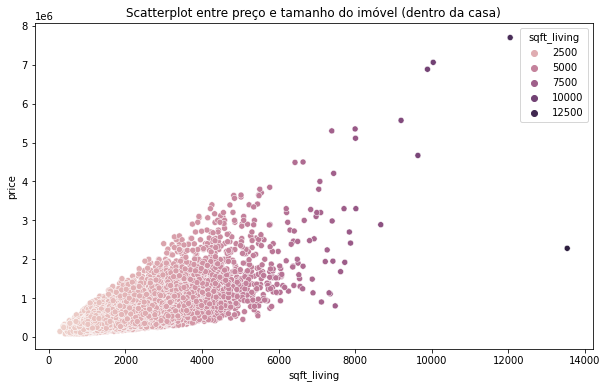

In [ ]:
ax11 = sns.scatterplot(data=df, x="sqft_living", y="price", hue="sqft_living")
ax11.figure.set_size_inches(10, 6)
ax11.set_title('Scatterplot entre preço e tamanho do imóvel (dentro da casa)')

Text(0.5, 1.0, 'Scatterplot entre preço e nota do imóvel')

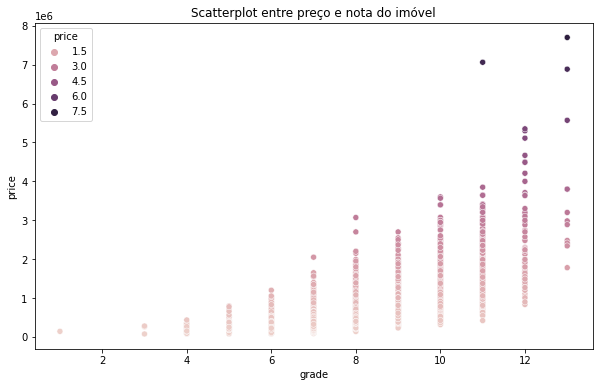

In [ ]:
ax12 = sns.scatterplot(data=df, x="grade", y="price", hue="price")
ax12.figure.set_size_inches(10, 6)
ax12.set_title('Scatterplot entre preço e nota do imóvel')

Text(0.5, 1.0, 'Scatterplot entre preço e tamanho da casa acima do solo (excluindo porão)')

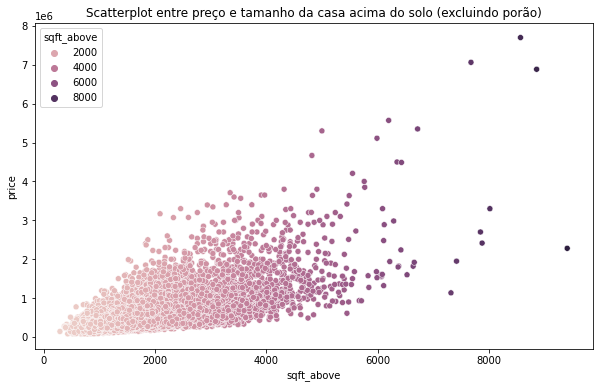

In [ ]:
ax13 = sns.scatterplot(data=df, x="sqft_above", y="price", hue="sqft_above")
ax13.figure.set_size_inches(10, 6)
ax13.set_title('Scatterplot entre preço e tamanho da casa acima do solo (excluindo porão)')

Text(0.5, 1.0, 'Scatterplot entre preço e número de banheiros')

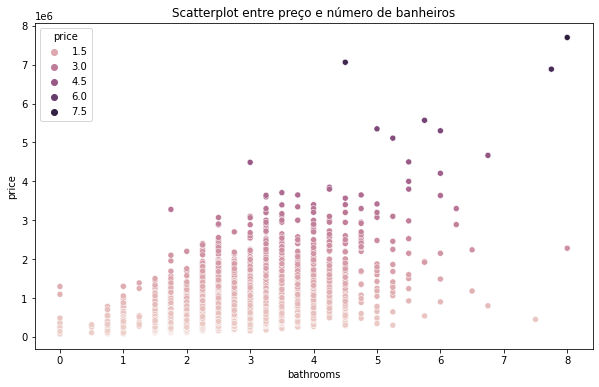

In [ ]:
ax14 = sns.scatterplot(data=df, x="bathrooms", y="price", hue="price")
ax14.figure.set_size_inches(10, 6)
ax14.set_title('Scatterplot entre preço e número de banheiros')

Text(0.5, 1.0, 'Scatterplot entre preço e número de quartos com vista')

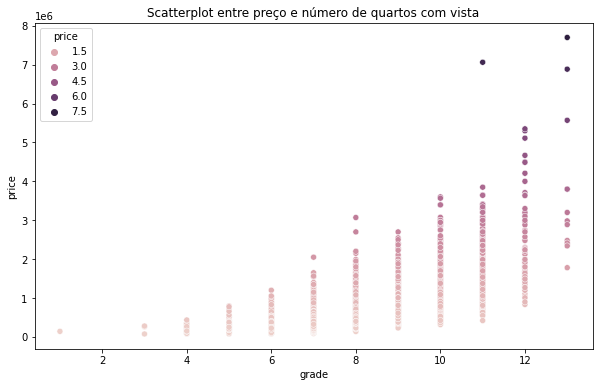

In [ ]:
ax15 = sns.scatterplot(data=df, x="grade", y="price", hue="price")
ax15.figure.set_size_inches(10, 6)
ax15.set_title('Scatterplot entre preço e número de quartos com vista')

Text(0.5, 1.05, 'Gráfico de dispersão entre preço e variáveis mais correlacionadas')

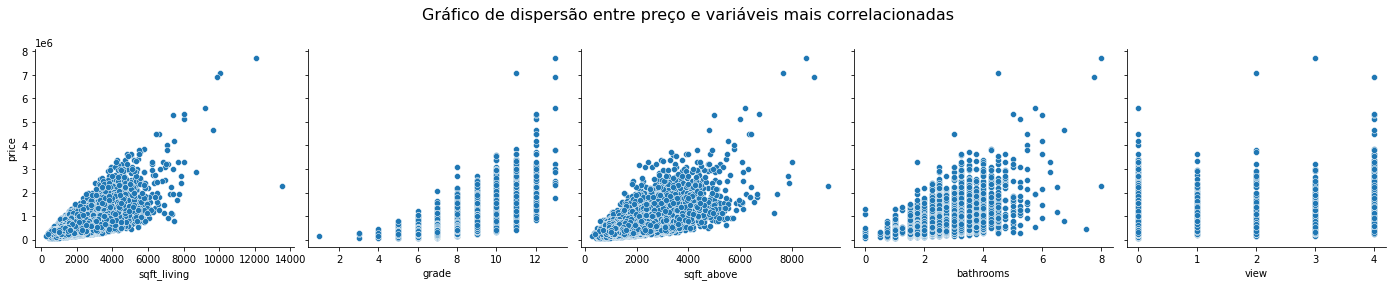

In [ ]:
#Pairplot com todas as variáveis mais correlacionadas em relação ao preço
ax16 = sns.pairplot(df, y_vars='price', x_vars=['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view'])
ax16.figure.set_size_inches(20,4)
ax16.fig.suptitle('Gráfico de dispersão entre preço e variáveis mais correlacionadas', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Gráfico de dispersão entre preço e variáveis mais correlacionadas')

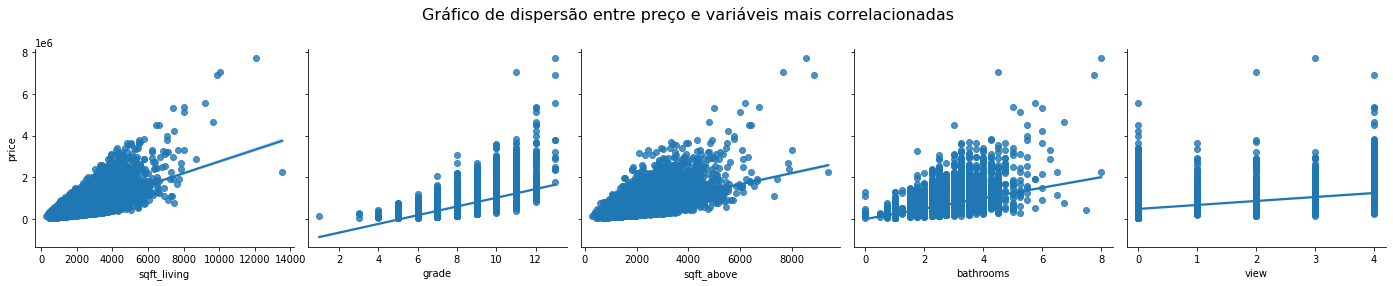

In [ ]:
#Pairplot com todas as variáveis mais correlacionadas em relação ao preço
ax16 = sns.pairplot(df, y_vars='price', x_vars=['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view'], kind='reg')
ax16.figure.set_size_inches(20,4)
ax16.fig.suptitle('Gráfico de dispersão entre preço e variáveis mais correlacionadas', fontsize=16, y=1.05)

## Regressão Linear



3. para cada uma das 5 variáveis faça uma regressão linear simples sendo
preciso a variável resposta (y) e interprete os resultados

In [ ]:
Y_sl = df.sqft_living
X_price = sm.add_constant(df.price)

resultado_regressao = sm.OLS(Y_sl, X_price, missing='drop').fit()
print(resultado_regressao.summary())  

                            OLS Regression Results                            
Dep. Variable:            sqft_living   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:38:01   Log-Likelihood:            -1.7079e+05
No. Observations:               21613   AIC:                         3.416e+05
Df Residuals:                   21611   BIC:                         3.416e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1131.3544      7.914    142.952      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
Y_g = df.grade
X_price = sm.add_constant(df.price)

resultado_regressao = sm.OLS(Y_g, X_price, missing='drop').fit()
print(resultado_regressao.summary())  

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:38:01   Log-Likelihood:                -27789.
No. Observations:               21613   AIC:                         5.558e+04
Df Residuals:                   21611   BIC:                         5.560e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5027      0.011    613.951      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
Y_sfa = df.sqft_above
X_price = sm.add_constant(df.price)

resultado_regressao = sm.OLS(Y_sfa, X_price, missing='drop').fit()
print(resultado_regressao.summary())  

                            OLS Regression Results                            
Dep. Variable:             sqft_above   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:38:01   Log-Likelihood:            -1.7095e+05
No. Observations:               21613   AIC:                         3.419e+05
Df Residuals:                   21611   BIC:                         3.419e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1050.6758      7.974    131.765      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
Y_b = df.bathrooms
X_price = sm.add_constant(df.price)

resultado_regressao = sm.OLS(Y_b, X_price, missing='drop').fit()
print(resultado_regressao.summary())  

                            OLS Regression Results                            
Dep. Variable:              bathrooms   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:38:01   Log-Likelihood:                -21536.
No. Observations:               21613   AIC:                         4.308e+04
Df Residuals:                   21611   BIC:                         4.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5198      0.008    191.632      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
Y_v = df.view
X_price = sm.add_constant(df.price)

resultado_regressao = sm.OLS(Y_v, X_price, missing='drop').fit()
print(resultado_regressao.summary())  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                   view   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4050.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:38:01   Log-Likelihood:                -23058.
No. Observations:               21613   AIC:                         4.612e+04
Df Residuals:                   21611   BIC:                         4.614e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2136      0.009    -25.100      0.0

# Challenge 2 - Modelos Regressivos

---



Suponha que você trabalha em uma empresa do setor imobiliário. Após explorar as
principais variáveis que impactam o preco dos imóveis,na semana passada, pediram
para você, do time de dados, construir um modelo que estime o preço de um imóvel.
Para isso, você utilizará a mesma base de dados da semana anterior
(desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?


## 1 - Selecione as principais variáveis que você gostaria de incluir no modelo de precificação do imóvel.

In [ ]:
from scipy.stats import skewnorm
from google.colab import drive
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import  linear_model
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
#Separando dados de treino e de teste em 20% de teste
X = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long']].copy()
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Selecionando variáveis por eliminação recursiva
model = linear_model.LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [ ]:
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 bedrooms
1 bathrooms
1 floors
1 waterfront
1 view
1 condition
1 grade
1 yr_built
1 lat
1 long
2 sqft_living
3 sqft_above
4 sqft_basement
5 zipcode
6 yr_renovated
7 sqft_lot


**R:** Através da eliminação recursiva é possível considerar como relevantes para o modelo todas as variáveis que estão em "primeiro lugar". Ou seja, As variáveis bedrooms até long.

## 2 - Construa um modelo de regressão linear multivariada para estimar o preço do imóvel. Lembre-se de: Analisar a tabela de regressão e os resíduos do modelo e interprete os resultados

In [ ]:
#Copiando para X apenas as variáveis consideradas relevantes
X = df[['bedrooms', 'bathrooms','waterfront', 'view', 'condition', 'grade', 'yr_built','lat', 'long']].copy() 
y = np.log(df['price']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
!pip install regressors

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12401 sha256=fba8f3d6b179c874dea821512c44495151dce58ff8527682ed805618c222b5e1
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


In [ ]:
from regressors import stats
print("\n=========== Resumo dos coeficientes ===========")
xlabels = X.columns
stats.summary(model, X, y, xlabels)


=========== Resumo dos coeficientes ===========
Residuals:
     Min       1Q  Median      3Q     Max
-1.45690 -0.16590 0.00410 0.17110 1.45250


Coefficients:
            Estimate  Std. Error    t value  p value
_intercept -23.64419     1.90470  -12.41360  0.00000
bedrooms     0.02603     0.00225   11.59580  0.00000
bathrooms    0.16507     0.00359   45.96020  0.00000
waterfront   0.40168     0.02326   17.27110  0.00000
view         0.08301     0.00257   32.35400  0.00000
condition    0.05457     0.00302   18.04330  0.00000
grade        0.24747     0.00204  121.39310  0.00000
yr_built    -0.00416     0.00001 -743.22750  0.00000
lat          1.35051     0.01252  107.91260  0.00000
long         0.17909     0.00295   60.75760  0.00000
---
R-squared:  0.73568,    Adjusted R-squared:  0.73557
F-statistic: 6680.87 on 9 features


**R.** Apesar de considerada anteriormente, a variável "floors" não foi estatisticamente relevante. Portanto, pode ser descartada do modelo.
De acordo com as estimativas, as variáveis mais relevantes são, respectivamente: lat (e long), waterfront, grade e bathrooms.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


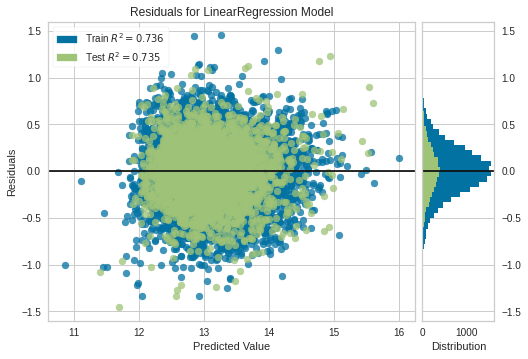

In [ ]:
#Análise de resíduos
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train.values)  
visualizer.score(X_test, y_test.values)  
visualizer.show()   

In [ ]:
y_pred = model.predict(X_test)
residuo = (y_test - y_pred)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("Erro absoluto médio:", mean_absolute_error(y_test, y_pred))
print("Erro quadrático médio:", mean_squared_error(y_test, y_pred))
print("Raíz quadrática média:", np.sqrt(mean_squared_error(y_test, y_pred)))

Erro absoluto médio: 0.21061955768151946
Erro quadrático médio: 0.0754606603041801
Raíz quadrática média: 0.27470103804714696


## 3 - Suponha agora que você encontrou um modelo ideal. Explique como você faria para colocar esse modelo em produção? Entenda por modelo em produção um modelo que a cada apartamento novo inserido na base precifique-o com base no seu modelo.

**R**. Eu criaria uma aplicação compatível com o processo de salvamento do modelo em binário e tratamento através do .py gerado no salavamento, para que, a cada inserção do usuário, suas entradas fossem utilizadas no modelo de base para retornar uma estimativa.